# PixHist


[![](https://github.com/sradc/PixHist/workflows/Python%20package/badge.svg)](https://github.com/sradc/PixHist/commits/)


`pip install pixhist`


*PixHist - pixel histogram.*


Dependencies: [Numba](http://numba.pydata.org/), [NumPy](https://numpy.org/), and [Matplotlib](https://matplotlib.org/) to use `pixhist.rendering`.

In [1]:
import matplotlib.pyplot as plt
from numba import njit
import numpy as np
import pixhist
import pixhist.rendering

## Example 1: create a pixhist from a generator

The generator should have no arguments, and return the values `x, y`:

`generator() -> x, y`

It should be compiled with Numba's `njit` / `jit`.

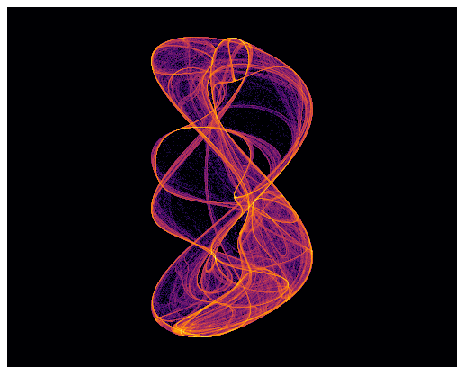

In [2]:
@njit
def gen():  
    """A Clifford Attractor"""
    x, y = 0, 0
    while True:
        yield x, y
        x_ = np.sin(2.27 * y) + 0.66 * np.cos(2.27 * x)
        y_ = np.sin(1.13 * x) + 2.16 * np.cos(1.13 * y)
        x, y = x_, y_

r = pixhist.estimate_range(gen, n_iter=100_000)
r = pixhist.scale_range(r, 1.2)

N_ITER = 1000_000
W = 500
H = 400
hist = pixhist.from_gen(gen, N_ITER, W, H, range=r, make_xy_proportional=True, log=True)

pixhist.rendering.plot(hist)
plt.show()

## Example 2: using a generator factory

Create a 'generator factory' to get around the fact that the generator should have no arguments.

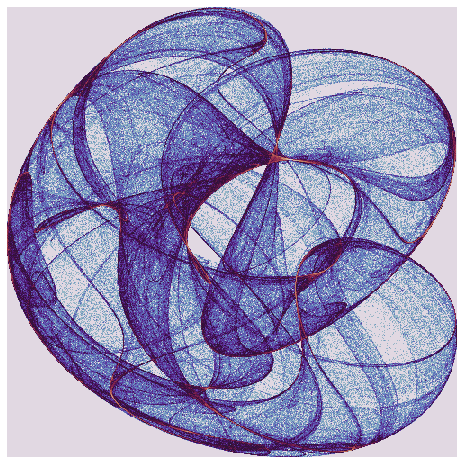

In [3]:
def get_clifford_generator(a, b, c, d, x_i=0, y_i=0):
    @njit
    def gen():
        x, y = x_i, y_i
        while True:
            yield x, y
            x_ = np.sin(a * y) + c * np.cos(a * x)
            y_ = np.sin(b * x) + d * np.cos(b * y)
            x, y = x_, y_
    return gen

params = [1.8, -1.4, -1.5, -0.71]
gen = get_clifford_generator(*params)
r = pixhist.estimate_range(gen, n_iter=100_000)

N_ITER = 1000_000
W, H = 500, 500
hist = pixhist.from_gen(gen, N_ITER, W, H, range=r, make_xy_proportional=False, log=True)

pixhist.rendering.plot(hist, cmap='twilight')
plt.show()

## Example 3: pixhist from arrays

Create a pixel histogram from two arrays of the same length.

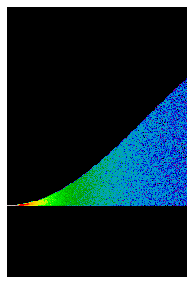

In [4]:
x_vals = np.random.random(100_000)
y_vals = np.sin(x_vals)**2 * np.random.random(100_000)

W, H = 200, 300
hist = pixhist.from_arrays(x_vals, y_vals, W, H, make_xy_proportional=True, log=True)

pixhist.rendering.plot(hist, cmap='nipy_spectral')
plt.show()

## Example 4: the advantage of using generators

You can have a large number of iterations, since you don't need to store the arrays `x_vals, y_vals` in memory. (Time becomes the limiting factor).

Time elapsed: 8.4 seconds


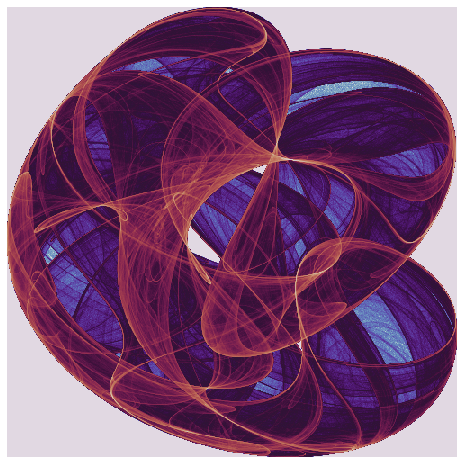

In [5]:
from magic_timer import MagicTimer
                
params = [1.8, -1.4, -1.5, -0.71]
gen = get_clifford_generator(*params)

r = pixhist.estimate_range(gen, n_iter=100_000)

N_ITER = 100_000_000
W, H = 500, 500

t = MagicTimer()
hist = pixhist.from_gen(gen, N_ITER, W, H, range=r, make_xy_proportional=False, log=True)
print('Time elapsed:', t)

pixhist.rendering.plot(hist, cmap='twilight')
plt.show()